In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-clinical-dataset100k-rows/diabetes_dataset_with_notes.csv


## Importing libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


## Data Exploration

In [3]:
data = pd.read_csv('/kaggle/input/diabetes-clinical-dataset100k-rows/diabetes_dataset_with_notes.csv')

In [4]:
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


### 1. Explore all the variables, check for missing values
### 2. Check the distributions of variables
### 3. Check the correlations
### 4. Encode some of the variables (required for logistic reg)
### 5. Remove variables that are not required

In [5]:
data.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
clinical_notes          0
dtype: int64

In [6]:
data.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.location.value_counts()

location
Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut             2035
Mississippi             2035
Missouri                2035
Alaska                  2035
North Carolina          2035
New Hampshire           2035
North Dakota            2035
South Dakota            2033
Montana                 2033
New Mexico              2033
Idaho

In [8]:
data.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
data.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
diabetes_counts = pd.DataFrame(data.diabetes.value_counts()).reset_index()

diabetes_counts['diabetes'] = diabetes_counts['diabetes'].replace({0:'non-diabetic', 1:'diabetic'})

diabetes_counts

,diabetes,count
0,non-diabetic,91500
1,diabetic,8500


<Figure size 400x400 with 0 Axes>

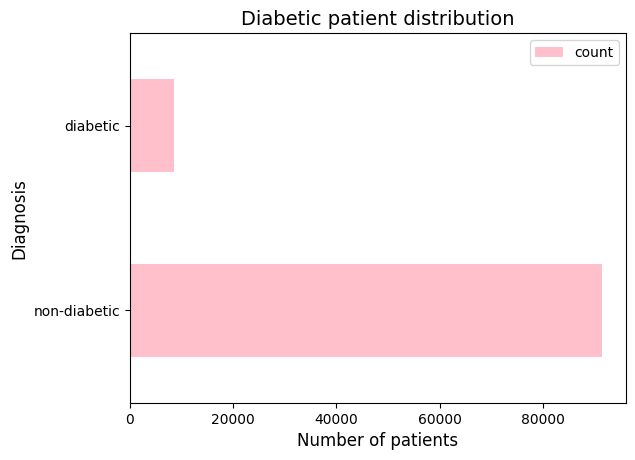

In [11]:

plt.figure(figsize=(4,4))
diabetes_counts.plot(kind='barh', color='pink')

plt.yticks(ticks=range(len(diabetes_counts)), labels=diabetes_counts['diabetes'], rotation=0)

plt.title('Diabetic patient distribution',fontsize=14)
plt.xlabel('Number of patients',fontsize=12)
plt.ylabel('Diagnosis',fontsize=12)

plt.yticks(rotation=0)
plt.show()

In [12]:
data.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [13]:
data.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [14]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [15]:
clinical_notes_data = data.clinical_notes.value_counts().reset_index()
clinical_notes_data[clinical_notes_data['count'] > 1000]

,clinical_notes,count
0,"Overweight, advised dietary and exercise modif...",4650
1,"Overweight, advised dietary and exercise modif...",2847
2,"Overweight, advised dietary and exercise modif...",2427
3,"Obese category, increased risk for diabetes an...",2197
4,Elderly patient with increased risk of chronic...,2019
5,"Young patient, generally lower risk but needs ...",1969
6,"Young patient, generally lower risk but needs ...",1772
7,"Obese category, increased risk for diabetes an...",1720
8,Healthy BMI range. Elevated blood glucose leve...,1567
9,"Overweight, advised dietary and exercise modif...",1550


## Feature Engineering

In [16]:
## deleting the unnecessary columns
## year, location, clinical_notes
## dropping race:Other as well to avoid multi collinearity
data_final = data.drop(columns = ['year','location','clinical_notes','race:Other'])


In [17]:
data_final.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,0,0,0,0,never,27.32,5.0,100,0
1,Female,29.0,0,1,0,0,0,0,never,19.95,5.0,90,0
2,Male,18.0,0,0,0,0,0,0,never,23.76,4.8,160,0
3,Male,41.0,0,0,1,0,0,0,never,27.32,4.0,159,0
4,Female,52.0,1,0,0,0,0,0,never,23.75,6.5,90,0


In [18]:
# one hot encode both the variables
# gender and smoking_history.. need to choose what particular category should be removed

encoded_data = pd.get_dummies(data_final,columns = ['gender','smoking_history'])
encoded_data = encoded_data.drop(columns = ['gender_Other','smoking_history_No Info'])
encoded_data[encoded_data.select_dtypes(include=['bool']).columns] = encoded_data.select_dtypes(include=['bool']).astype(int)
encoded_data.head()


,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,0,0,0,0,27.32,5.0,100,0,1,0,0,0,0,1,0
1,29.0,0,1,0,0,0,0,19.95,5.0,90,0,1,0,0,0,0,1,0
2,18.0,0,0,0,0,0,0,23.76,4.8,160,0,0,1,0,0,0,1,0
3,41.0,0,0,1,0,0,0,27.32,4.0,159,0,0,1,0,0,0,1,0
4,52.0,1,0,0,0,0,0,23.75,6.5,90,0,1,0,0,0,0,1,0


In [19]:
encoded_data.corr()

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,-0.002183,0.003787,0.003790,0.001962,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,0.030480,-0.030282,0.030946,0.065768,0.216481,0.065498,0.067663
race:AfricanAmerican,-0.002183,1.000000,-0.251859,-0.250765,-0.250860,-0.001201,-0.000664,-0.001249,0.001312,0.002292,0.004378,-0.001717,0.001800,-0.004367,0.001939,0.001261,0.004160,0.002557
race:Asian,0.003787,-0.251859,1.000000,-0.249148,-0.249241,0.003977,0.006166,0.005240,-0.000473,0.000171,0.003739,-0.000161,0.000243,-0.006423,0.001351,-0.000927,-0.001218,0.000064
race:Caucasian,0.003790,-0.250765,-0.249148,1.000000,-0.248159,0.000503,-0.001225,-0.002114,-0.004033,0.004121,-0.001749,0.004334,-0.004610,0.003394,0.001938,-0.002393,0.001497,0.003428
race:Hispanic,0.001962,-0.250860,-0.249241,-0.248159,1.000000,0.001369,-0.000771,0.002363,0.000446,-0.002684,-0.001301,-0.002229,0.002258,0.008304,-0.002085,0.000781,-0.004446,-0.003487
hypertension,0.251171,-0.001201,0.003977,0.000503,0.001369,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,-0.014318,0.014423,0.017930,0.023124,0.083401,0.045953,0.000997
heart_disease,0.233354,-0.000664,0.006166,-0.001225,-0.000771,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,-0.077832,0.077911,0.007604,0.040671,0.095194,-0.030843,0.007922
bmi,0.337396,-0.001249,0.005240,-0.002114,0.002363,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,0.023016,-0.023021,0.053617,0.044343,0.111312,0.086849,0.034979
hbA1c_level,0.101354,0.001312,-0.000473,-0.004033,0.000446,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,-0.020015,0.020058,0.006123,0.009655,0.037306,0.010684,0.009830
blood_glucose_level,0.110672,0.002292,0.000171,0.004121,-0.002684,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,-0.017200,0.017189,0.012447,0.006267,0.040688,0.012475,0.008613


In [20]:
#checking the correlation
corr_data = pd.DataFrame(encoded_data.corr()['diabetes'])
corr_data

corr_data.drop(index=['diabetes','race:AfricanAmerican','race:Asian','race:Caucasian','race:Hispanic','gender_Female'],inplace=True)

corr_data = corr_data.sort_values(by = 'diabetes', ascending=False)

corr_data['diabetes'] = corr_data['diabetes'].round(2)

corr_data

,diabetes
blood_glucose_level,0.42
hbA1c_level,0.40
age,0.26
bmi,0.21
hypertension,0.20
heart_disease,0.17
smoking_history_former,0.10
gender_Male,0.04
smoking_history_never,0.03
smoking_history_ever,0.02


<Figure size 1000x600 with 0 Axes>

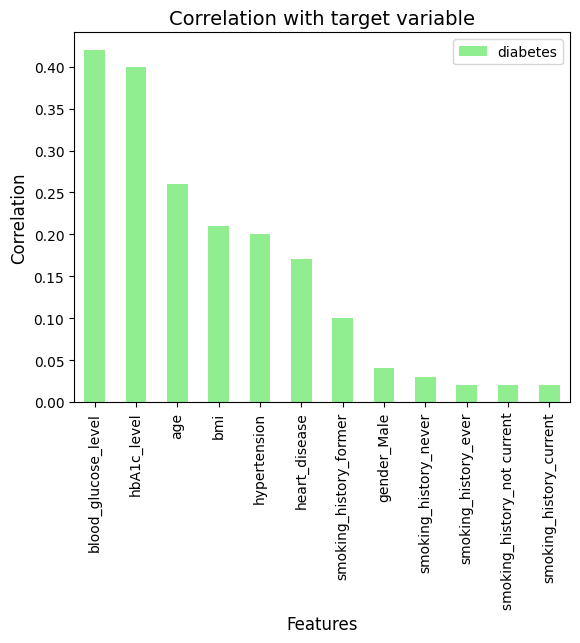

In [21]:
plt.figure(figsize=(10,6))
corr_data.plot(kind='bar',color='lightgreen')

plt.title('Correlation with target variable',fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize = 12)

plt.xticks(rotation = 90)
plt.show()

In [22]:
## need to remove gender_female coz of correlation, race also can be removed maybe
encoded_data = encoded_data.drop(columns=['gender_Female'])
encoded_data_no_race = encoded_data.drop(columns=['race:AfricanAmerican','race:Asian','race:Caucasian','race:Hispanic'])

In [23]:
encoded_data_no_race.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,27.32,5.0,100,0,0,0,0,0,1,0
1,29.0,0,0,19.95,5.0,90,0,0,0,0,0,1,0
2,18.0,0,0,23.76,4.8,160,0,1,0,0,0,1,0
3,41.0,0,0,27.32,4.0,159,0,1,0,0,0,1,0
4,52.0,0,0,23.75,6.5,90,0,0,0,0,0,1,0


## Model Fitting

### Data Splitting

In [24]:
#train test split of the data
X = encoded_data_no_race.drop(columns=['diabetes'])
y = encoded_data_no_race[['diabetes']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3,stratify = y)

In [25]:
y_train.value_counts(normalize=True)

diabetes
0           0.915
1           0.085
Name: proportion, dtype: float64

In [26]:
y_test.value_counts(normalize=True)

diabetes
0           0.915
1           0.085
Name: proportion, dtype: float64

### Logistic Regression begins

In [27]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train.values.ravel())

In [28]:
lr_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear',max_iter=1000).fit(X_train, y_train.values.ravel())
lr_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear',max_iter=1000).fit(X_train, y_train.values.ravel())



In [29]:
# model test on y_test
# check for model cooffieiencts
# precison recall accuracy metrics

y_pred_test = lr.predict(X_test)
y_pred_test_l1 = lr_l1.predict(X_test)
y_pred_test_l2 = lr_l2.predict(X_test)

y_prob_test = lr.predict_proba(X_test)[:,1]
y_prob_test_l1 = lr_l1.predict_proba(X_test)[:,1]
y_prob_test_l2 = lr_l2.predict_proba(X_test)[:,1]



In [30]:
y_pred_test.shape

(30000,)

In [31]:
y_prob_test.shape

(30000,)

In [32]:
metrics = []
#precison recall accuracy metrics
for test_values in [[y_pred_test,y_prob_test],[y_pred_test_l1,y_prob_test_l1],[y_pred_test_l2,y_prob_test_l2]]:
    precision, recall, fscore, _ = score(y_test,test_values[0],average='binary')
    accuracy = accuracy_score(y_test,test_values[0])
    auc = roc_auc_score(y_test,test_values[1])


    metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0,1,2
precision,0.857297,0.859409,0.848341
recall,0.621961,0.616078,0.631765
fscore,0.720909,0.717679,0.724208
accuracy,0.959067,0.958800,0.959100
auc,0.960644,0.960227,0.960653


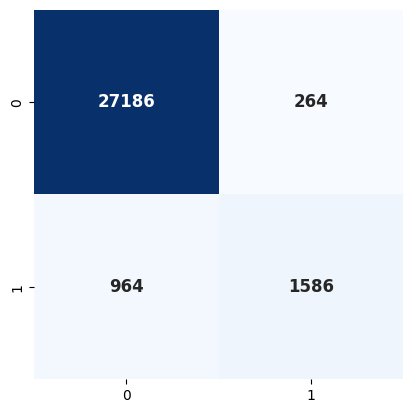

In [33]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

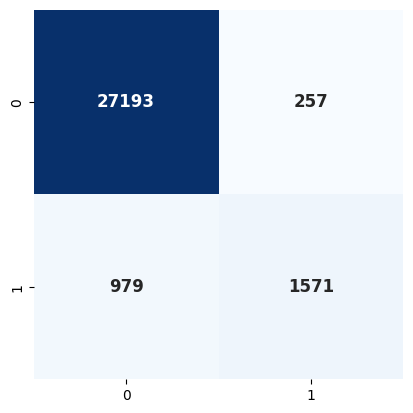

In [34]:
cm_l1 = confusion_matrix(y_test, y_pred_test_l1)

sns.heatmap(cm_l1,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

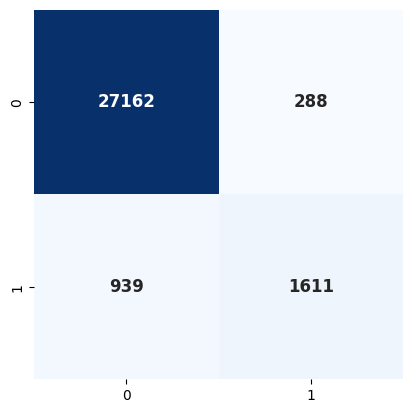

In [35]:
cm_l2 = confusion_matrix(y_test, y_pred_test_l2)

sns.heatmap(cm_l2,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

In [36]:
#check feature coeffs
coeffs = lr.coef_.ravel().tolist()
coeffs_l1 = lr_l1.coef_.ravel().tolist()
coeffs_l2 = lr_l2.coef_.ravel().tolist()
feature_names = X_train.columns.tolist()

coeff_values = pd.DataFrame({'lr':coeffs,'lr_l1':coeffs_l1,'lr_l2':coeffs_l2},index=feature_names)
coeff_values

,lr,lr_l1,lr_l2
age,0.044333,0.045151,0.046640
hypertension,0.747307,0.715928,0.747910
heart_disease,0.732046,0.648591,0.738293
bmi,0.079913,0.081749,0.085544
hbA1c_level,2.054440,2.047729,2.217180
blood_glucose_level,0.031621,0.031684,0.032874
gender_Male,0.244196,0.217931,0.264795
smoking_history_current,0.664035,0.405543,0.712096
smoking_history_ever,0.529278,0.177275,0.570846
smoking_history_former,0.521093,0.273920,0.547850


In [37]:
encoded_data_no_race.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,27.32,5.0,100,0,0,0,0,0,1,0
1,29.0,0,0,19.95,5.0,90,0,0,0,0,0,1,0
2,18.0,0,0,23.76,4.8,160,0,1,0,0,0,1,0
3,41.0,0,0,27.32,4.0,159,0,1,0,0,0,1,0
4,52.0,0,0,23.75,6.5,90,0,0,0,0,0,1,0


### Scaling the data to get a better cooef estimate

In [38]:

cols_to_scale = ['age','bmi','hbA1c_level','blood_glucose_level']

scaler = MinMaxScaler()

#fitting on the training data to scale
train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_train_scaled = X_train.copy()
X_train_scaled[cols_to_scale] = train_scaled

#fitting for test
test_scaled = scaler.transform(X_test[cols_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = test_scaled

In [39]:
#fitting the data and extracting metrics
lr = LogisticRegression(solver='liblinear').fit(X_train_scaled, y_train.values.ravel())
lr_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear',max_iter=1000).fit(X_train_scaled, y_train.values.ravel())
lr_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear',max_iter=1000).fit(X_train_scaled, y_train.values.ravel())


In [40]:
y_pred_test = lr.predict(X_test_scaled)
y_pred_test_l1 = lr_l1.predict(X_test_scaled)
y_pred_test_l2 = lr_l2.predict(X_test_scaled)

y_prob_test = lr.predict_proba(X_test_scaled)[:,1]
y_prob_test_l1 = lr_l1.predict_proba(X_test_scaled)[:,1]
y_prob_test_l2 = lr_l2.predict_proba(X_test_scaled)[:,1]

In [41]:
metrics = []
#precison recall accuracy metrics
for test_values in [[y_pred_test,y_prob_test],[y_pred_test_l1,y_prob_test_l1],[y_pred_test_l2,y_prob_test_l2]]:
    precision, recall, fscore, _ = score(y_test,test_values[0],average='binary')
    accuracy = accuracy_score(y_test,test_values[0])
    auc = roc_auc_score(y_test,test_values[1])


    metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0,1,2
precision,0.854925,0.869226,0.848739
recall,0.626275,0.612549,0.633725
fscore,0.722952,0.718657,0.725640
accuracy,0.959200,0.959233,0.959267
auc,0.960579,0.959977,0.960614


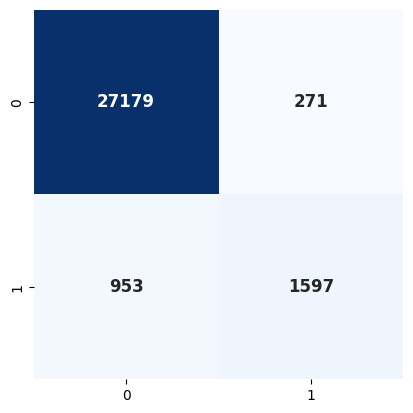

In [42]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

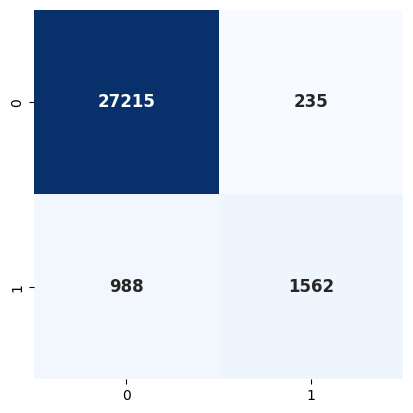

In [43]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test_l1)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

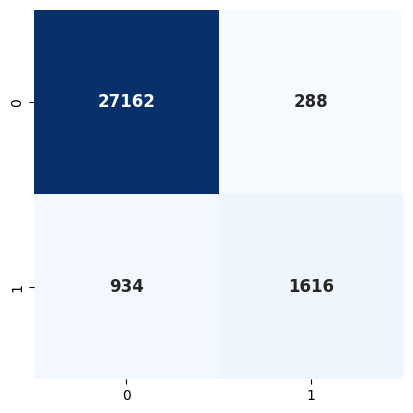

In [44]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test_l2)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

In [45]:
#check feature coeffs
coeffs = lr.coef_.ravel().tolist()
coeffs_l1 = lr_l1.coef_.ravel().tolist()
coeffs_l2 = lr_l2.coef_.ravel().tolist()
feature_names = X_train_scaled.columns.tolist()

coeff_values = pd.DataFrame({'lr':coeffs,'lr_l1':coeffs_l1,'lr_l2':coeffs_l2},index=feature_names)
coeff_values

,lr,lr_l1,lr_l2
age,3.601353,3.335555,3.758621
hypertension,0.759444,0.746869,0.757885
heart_disease,0.734101,0.668032,0.737323
bmi,6.807669,5.764858,7.327114
hbA1c_level,11.768341,11.049706,12.434660
blood_glucose_level,7.089294,6.734150,7.298298
gender_Male,0.252202,0.205829,0.267190
smoking_history_current,0.698414,0.407203,0.734740
smoking_history_ever,0.555475,0.196766,0.584393
smoking_history_former,0.541451,0.319648,0.554368


### KNN Classifier

In [47]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5,15,25,50,100,200,300],'weights':['uniform','distance']}

grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='recall',n_jobs=-1)
grid_search.fit(X_train_scaled,y_train.values.ravel())



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 50, 100, 200, 300],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [48]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [49]:
grid_search.best_score_

0.6228571428571429

In [50]:
test_results = pd.DataFrame(grid_search.cv_results_)
print(test_results[['param_n_neighbors','param_weights','mean_test_score','rank_test_score']])

   param_n_neighbors param_weights  mean_test_score  rank_test_score
0                  5       uniform         0.611933                2
1                  5      distance         0.622857                1
2                 15       uniform         0.550084                4
3                 15      distance         0.570084                3
4                 25       uniform         0.521176                6
5                 25      distance         0.546050                5
6                 50       uniform         0.448067                8
7                 50      distance         0.496471                7
8                100       uniform         0.343866               10
9                100      distance         0.424874                9
10               200       uniform         0.226218               13
11               200      distance         0.314286               11
12               300       uniform         0.154118               14
13               300      distance

In [51]:
#using the best estimator to fit on the test data
best_knn = grid_search.best_estimator_

y_pred_test = best_knn.predict(X_test_scaled)

metrics = []

precision, recall, fscore, _ = score(y_test,y_pred_test,average='binary')
accuracy = accuracy_score(y_test,y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)


metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0
precision,0.858939
recall,0.616078
fscore,0.717515
accuracy,0.958767
auc,0.803340


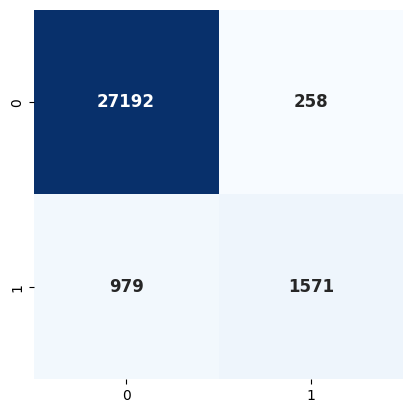

In [52]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

### SVM Classifier

In [53]:
svm = SVC(max_iter=20000,class_weight='balanced',random_state=24)
param_grid = {'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale',0.1]}

grid_search = GridSearchCV(svm,param_grid,cv=3,scoring='f1',n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train.values.ravel())

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', max_iter=20000,
                           random_state=24),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

In [54]:
test_results = pd.DataFrame(grid_search.cv_results_)
test_results[['params','mean_test_score','rank_test_score']]


,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.571979,4
1,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.558228,12
2,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.571979,4
3,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.567828,9
4,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.571076,6
5,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.578828,2
6,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.571076,6
7,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.569698,8
8,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.563990,10
9,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.589296,1


In [55]:
#using the best estimator to fit on the test data

best_svc = grid_search.best_estimator_

y_pred_test = best_svc.predict(X_test_scaled)

metrics = []

precision, recall, fscore, _ = score(y_test,y_pred_test,average='binary')
accuracy = accuracy_score(y_test,y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)


metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0
precision,0.424114
recall,0.900784
fscore,0.576701
accuracy,0.887600
auc,0.893580


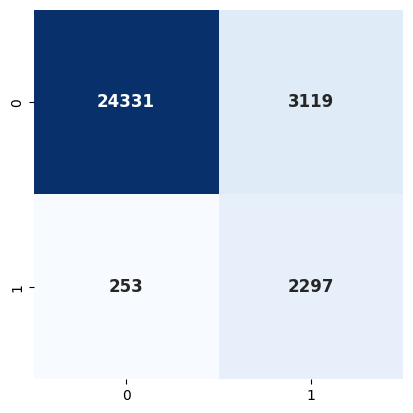

In [56]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

In [53]:
y_train.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
## Fitting Random Forest Model
rf = RandomForestClassifier(random_state=24,max_features = 'sqrt',class_weight = 'balanced')
param_grid = {'n_estimators':[50,100,200], 'max_depth':[10,20],'min_samples_split':[2,5,10]}

grid_search = GridSearchCV(rf,param_grid,cv=3,scoring='f1',n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train.values.ravel())


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=24),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [55]:
test_results = pd.DataFrame(grid_search.cv_results_)
test_results[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.637414,17
1,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.645810,12
2,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.644580,13
3,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.632695,18
4,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.640839,14
5,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.640218,15
6,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.639944,16
7,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.647055,10
8,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.645837,11
9,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.788834,3


In [56]:
#using the best estimator to fit on the test data
best_rf = grid_search.best_estimator_

y_pred_test = best_rf.predict(X_test_scaled)

metrics = []

precision, recall, fscore, _ = score(y_test,y_pred_test,average='binary')
accuracy = accuracy_score(y_test,y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)


metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0
precision,0.888554
recall,0.694118
fscore,0.779392
accuracy,0.966600
auc,0.843015


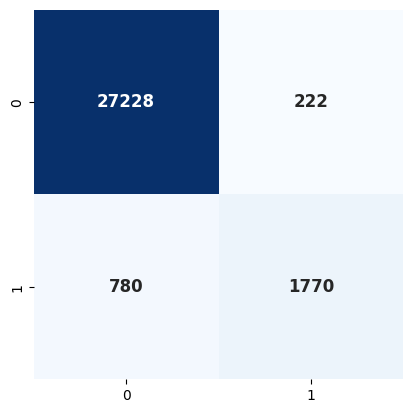

In [57]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

### Gradient Boost

In [59]:
gbc = GradientBoostingClassifier(random_state=24,max_features = 'sqrt')
param_grid = {'n_estimators':[50,100,200], 'max_depth':[3,5,10],'min_samples_split':[2,5,10], 'learning_rate': [0.01, 0.1]}

grid_search = GridSearchCV(gbc,param_grid,cv=3,scoring='f1',n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train.values.ravel())

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=24),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [60]:
test_results = pd.DataFrame(grid_search.cv_results_)
test_results[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.000000,46
1,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.573117,43
2,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.803257,30
3,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.000000,46
4,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.573117,43
5,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.803257,30
6,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.000000,46
7,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.573117,43
8,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.803257,30
9,"{'learning_rate': 0.01, 'max_depth': 5, 'min_s...",0.000000,46


In [61]:
# #using the best estimator to fit on the test data
best_gbc = grid_search.best_estimator_

y_pred_test = best_gbc.predict(X_test_scaled)

metrics = []

precision, recall, fscore, _ = score(y_test,y_pred_test,average='binary')
accuracy = accuracy_score(y_test,y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)


metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0
precision,0.978567
recall,0.680392
fscore,0.802683
accuracy,0.971567
auc,0.839504


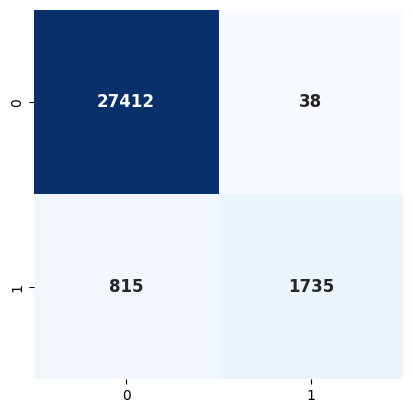

In [62]:
# #confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

### Ada Boost

In [63]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),random_state=24)
param_grid = {'n_estimators':[50,100,200], 'algorithm':['SAMME.R','SAMME'], 'learning_rate': [0.1,0.5,1]}

grid_search = GridSearchCV(abc,param_grid,cv=3,scoring='f1',n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train.values.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=24),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [64]:
test_results = pd.DataFrame(grid_search.cv_results_)

In [65]:
grid_search.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200, random_state=24)

In [66]:
#using the best estimator to fit on the test data
best_abc = grid_search.best_estimator_

y_pred_test = best_abc.predict(X_test_scaled)

metrics = []

precision, recall, fscore, _ = score(y_test,y_pred_test,average='binary')
accuracy = accuracy_score(y_test,y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)


metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics

,0
precision,0.968889
recall,0.683922
fscore,0.801839
accuracy,0.971267
auc,0.840941


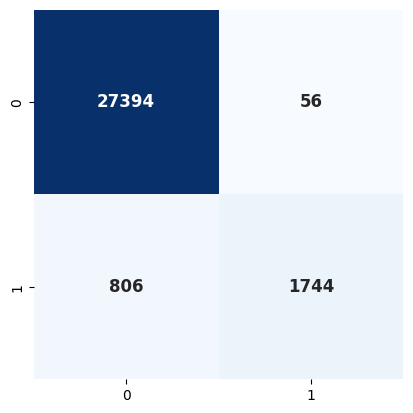

In [67]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()

In [70]:
#Stacking
# to get best results - combine rf, gbc and adaboost
base_models = [('rf',best_rf),('gbc',best_gbc),('abc',best_abc)]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_meta_features = np.zeros((X_train_scaled.shape[0], len(base_models)))  # 80k x 3
test_meta_features = np.zeros((X_test_scaled.shape[0], len(base_models)))   # 20k x 3

for i, (name, model) in enumerate(base_models):
    print(f"Generating predictions for: {name}")
    test_preds = np.zeros(X_test_scaled.shape[0])
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_tr, X_val = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Clone the model to avoid modifying the stored estimator
        from sklearn.base import clone
        model_clone = clone(model)
        model_clone.fit(X_tr, y_tr.values.ravel())  # Fit on fold
        train_meta_features[val_idx, i] = model_clone.predict_proba(X_val)[:, 1]  # OOF predictions
        test_preds += model_clone.predict_proba(X_test_scaled)[:, 1] / kf.n_splits
    
    test_meta_features[:, i] = test_preds

# Step 4: Train meta-model (Logistic Regression)
meta_model = LogisticRegression(random_state=42)
meta_model.fit(train_meta_features, y_train)

# Step 5: Predict on test data with meta-model
y_pred_meta = meta_model.predict(test_meta_features)


#Step 6: Collecting the results
metrics = []

precision, recall, fscore, _ = score(y_test,y_pred_meta,average='binary')
accuracy = accuracy_score(y_test,y_pred_meta)
auc = roc_auc_score(y_test,y_pred_meta)


metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc}))

metrics = pd.concat(metrics,axis=1)

metrics


Generating predictions for: rf
Generating predictions for: gbc
Generating predictions for: abc


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
precision,0.938657
recall,0.696078
fscore,0.799370
accuracy,0.970300
auc,0.845926


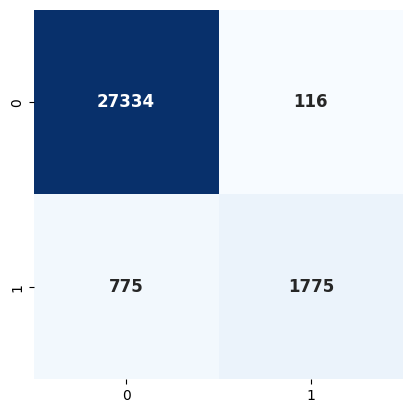

In [71]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_meta)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',square=True,linecolor='gray',annot_kws = {'size':12,'weight':'bold'},cbar=False)
plt.show()